In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/classes.json
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_002.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_006.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_005.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_003.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_004.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_007.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_009.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/

In [2]:
pip install patchify

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
root_directory = '/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset'

In [5]:
patch_size = 256

In [6]:
image_dataset = []
for path, subdirs, files in os.walk(root_directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'images':
    images = os.listdir(path)
    images.sort()
    for i, image_name in enumerate(images):
      if image_name.endswith(".jpg"):
        image = cv2.imread(path+"/"+image_name, 1)
        size_x = (image.shape[1]//patch_size)*patch_size
        size_y = (image.shape[0]//patch_size)*patch_size
        image = Image.fromarray(image)
        image = image.crop((0, 0, size_x, size_y))
        image = np.array(image)
        patches_img = patchify(image, (patch_size, patch_size, 3), step = patch_size)
     
        for i in range(patches_img.shape[0]):
          for j in range(patches_img.shape[1]):
            single_patch_img = patches_img[i,j,:,:]
            #Use minmaxscaler instead of just dividing by 255. 
            single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
            single_patch_img = single_patch_img[0]
            image_dataset.append(single_patch_img)

In [7]:
mask_dataset = []
for path, subdirs, files in os.walk(root_directory):
  dirname = path.split(os.path.sep)[-1]
  if dirname == 'masks':
    masks = os.listdir(path)
    masks.sort()
    print(masks)
    for i, mask_name in enumerate(masks):
      if mask_name.endswith(".png"):
        mask = cv2.imread(path+"/"+mask_name, 1)
        mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
        size_x = (mask.shape[1]//patch_size)*patch_size
        size_y = (mask.shape[0]//patch_size)*patch_size
        mask = Image.fromarray(mask)
        mask = mask.crop((0, 0, size_x, size_y))
        mask = np.array(mask)
        patches_mask = patchify(mask, (patch_size, patch_size, 3), step = patch_size)
     
        for i in range(patches_mask.shape[0]):
          for j in range(patches_mask.shape[1]):
            single_patch_mask = patches_mask[i,j,:,:]
            #Use minmaxscaler instead of just dividing by 255. 
            single_patch_mask = single_patch_mask[0]
            mask_dataset.append(single_patch_mask)

['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png']
['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png']
['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png']
['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png']
['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png']
['ima

In [8]:
print(np.shape(image_dataset))

(1305, 256, 256, 3)


In [9]:
image_dataset = np.array(image_dataset)
mask_dataset =  np.array(mask_dataset)
print(np.shape(image_dataset))
print(np.shape(mask_dataset))

(1305, 256, 256, 3)
(1305, 256, 256, 3)


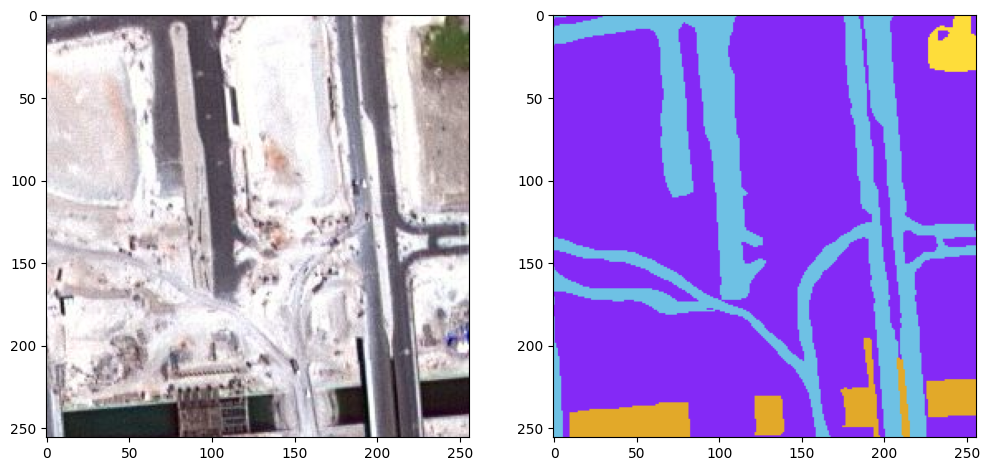

[[[110 193 228]
  [110 193 228]
  [110 193 228]
  ...
  [132  41 246]
  [132  41 246]
  [132  41 246]]

 [[110 193 228]
  [110 193 228]
  [110 193 228]
  ...
  [132  41 246]
  [132  41 246]
  [132  41 246]]

 [[110 193 228]
  [132  41 246]
  [132  41 246]
  ...
  [132  41 246]
  [132  41 246]
  [132  41 246]]

 ...

 [[110 193 228]
  [110 193 228]
  [110 193 228]
  ...
  [132  41 246]
  [132  41 246]
  [132  41 246]]

 [[110 193 228]
  [110 193 228]
  [110 193 228]
  ...
  [132  41 246]
  [132  41 246]
  [132  41 246]]

 [[110 193 228]
  [110 193 228]
  [110 193 228]
  ...
  [132  41 246]
  [132  41 246]
  [132  41 246]]]


In [10]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()
print(mask_dataset[image_number])

In [11]:
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

In [12]:
print(single_patch_mask[1,1,:])

[132  41 246]


In [13]:
def rgb_to_2D_label(label):
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    label_seg = label_seg[:,:,0]
    return label_seg

In [14]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_2D_label(mask_dataset[i])
  labels.append(label)

In [15]:
labels = np.array(labels)
labels = np.expand_dims(labels, axis = 3)
print(labels.shape)

(1305, 256, 256, 1)


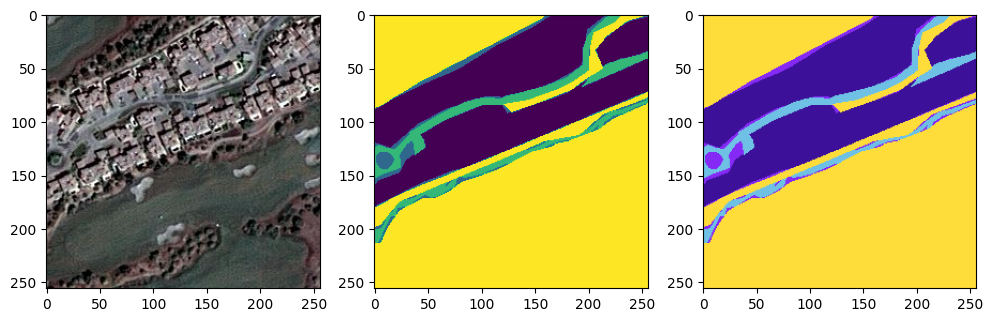

In [16]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(image_dataset[image_number])
plt.subplot(132)
plt.imshow(labels[image_number][:,:,0])
plt.subplot(133)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()

In [17]:
n_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes = n_classes)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)

In [19]:
!pip install -U -q segmentation-models
import segmentation_models as sm

AttributeError: module 'keras.utils' has no attribute 'generic_utils'

In [ ]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights=weights) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss) 

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)



################################################################
def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.2)(c1)  # Original 0.1
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model
 

In [ ]:
metrics=['accuracy', jacard_coef]

In [ ]:
def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

In [ ]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [ ]:
model = get_model()
model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
model.summary()

In [ ]:

history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

In [ ]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize = (6, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()
print(mask_dataset[image_number])
image_dataset[image_number] = np.expand_dims(image_dataset[image_number], axis=0)
print(np.shape(image_dataset[image_number]))
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize = (12, 6))
plt.subplot(131)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(132)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
image = np.expand_dims(image_dataset[image_number], axis=0)
output = model.predict(image)
output = np.array(output)
print(np.shape(output))
plt.subplot(133)
plt.imshow(np.reshape(output, (patch_size, patch_size, 3)))
plt.show()

In [ ]:
image = np.expand_dims(image_dataset[image_number], axis=0)
print(np.shape(image))
output = model.predict(image)
np.shape(output)
print(output)
